In [72]:
# Lectura de librerías
using DataFrames, CSV, Econometrics;
using Query;

In [73]:
# Lectura de datos
DEM_HET  = CSV.read("DEM_HET.csv", DataFrame);

In [74]:
describe(DEM_HET)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,PA,109.024,89.15,111.77,124.85,,,Float64
2,PB,81.9117,51.04,81.49,111.66,,,Float64
3,PC,127.679,85.85,130.835,182.04,,,Float64
4,QA,109.594,93.01,105.93,140.97,,,Float64
5,Y,180.645,100.0,188.37,254.95,,,Float64


In [75]:
# Estimación MCO
modelo_MCO = fit(EconometricModel, @formula(log(QA) ~ log(PA) + log(PB) + log(PC)+ log(Y)), DEM_HET)

Continuous Response Model
Number of observations: 30
Null Loglikelihood: 21.03
Loglikelihood: 37.17
R-squared: 0.6643
LR Test: 32.28 ∼ χ²(4) ⟹  Pr > χ² = 0.0000
Formula: log(QA) ~ 1 + (log(PA)) + (log(PB)) + (log(PC)) + (log(Y))
Variance Covariance Estimator: OIM
───────────────────────────────────────────────────────────────────────────
                 PE        SE      t-value  Pr > |t|      2.50%      97.50%
───────────────────────────────────────────────────────────────────────────
(Intercept)   4.27468   1.20524    3.54676    0.0016   1.79245    6.75691
log(PA)      -0.89012   0.215719  -4.1263     0.0004  -1.3344    -0.445839
log(PB)       0.554186  0.130026   4.26212    0.0003   0.286393   0.82198
log(PC)      -0.349092  0.183114  -1.90642    0.0682  -0.726222   0.0280386
log(Y)        0.743952  0.135187   5.50313    <1e-04   0.465529   1.02238
───────────────────────────────────────────────────────────────────────────

In [77]:
# Estimación MCO-HC
modelo_MCO_HC = fit(EconometricModel, @formula(log(QA) ~ log(PA) + log(PB) + log(PC)+ log(Y)), DEM_HET, vce = HC1)

Continuous Response Model
Number of observations: 30
Null Loglikelihood: 21.03
Loglikelihood: 37.17
R-squared: 0.6643
LR Test: 32.28 ∼ χ²(4) ⟹  Pr > χ² = 0.0000
Formula: log(QA) ~ 1 + (log(PA)) + (log(PB)) + (log(PC)) + (log(Y))
Variance Covariance Estimator: HC1
────────────────────────────────────────────────────────────────────────────
                 PE         SE      t-value  Pr > |t|      2.50%      97.50%
────────────────────────────────────────────────────────────────────────────
(Intercept)   4.27468   0.899308    4.7533     <1e-04   2.42252    6.12684
log(PA)      -0.89012   0.135608   -6.5639     <1e-06  -1.16941   -0.610829
log(PB)       0.554186  0.0833103   6.65208    <1e-06   0.382606   0.725767
log(PC)      -0.349092  0.150585   -2.31824    0.0289  -0.659227  -0.0389561
log(Y)        0.743952  0.118791    6.2627     <1e-05   0.499298   0.988607
────────────────────────────────────────────────────────────────────────────

In [82]:
resid=residuals(modelo_MCO)

30-element Vector{Float64}:
  0.05912411898114378
 -0.0008175975266127011
  0.036935136714103756
 -0.06591029527972747
  0.0419812704695266
 -0.002979112197225575
  0.00448553521895434
 -0.014487919269589256
  0.02808339410341798
 -0.0284621745652176
 -0.053587722822471484
 -0.04625676727132255
  0.08775480999629082
  ⋮
  0.05563910088424784
  0.0387555892479341
 -0.016785072615013163
 -0.022475488340812255
 -0.05610322139894208
 -0.07382160637492774
  0.20190877131414808
 -0.013654721693768579
  0.16212542013583864
 -0.11825870250511983
 -0.04714529613052143
  0.07831582564764794

In [83]:
Y=(DEM_HET.Y)

30-element Vector{Float64}:
 100.0
 107.779998779297
 111.129997253418
 116.959999084473
 118.529998779297
 127.160003662109
 133.309997558594
 134.740005493164
 153.679992675781
 155.440002441406
 161.320007324219
 164.440002441406
 166.929992675781
   ⋮
 204.270004272461
 208.779998779297
 216.619995117188
 217.800003051758
 222.110000610352
 222.309997558594
 231.130004882812
 231.190002441406
 234.25
 241.949996948242
 242.160003662109
 254.949996948242

In [84]:
# Regresión auxiliar
data = DataFrame()

""
""


In [85]:
data.resid = resid

30-element Vector{Float64}:
  0.05912411898114378
 -0.0008175975266127011
  0.036935136714103756
 -0.06591029527972747
  0.0419812704695266
 -0.002979112197225575
  0.00448553521895434
 -0.014487919269589256
  0.02808339410341798
 -0.0284621745652176
 -0.053587722822471484
 -0.04625676727132255
  0.08775480999629082
  ⋮
  0.05563910088424784
  0.0387555892479341
 -0.016785072615013163
 -0.022475488340812255
 -0.05610322139894208
 -0.07382160637492774
  0.20190877131414808
 -0.013654721693768579
  0.16212542013583864
 -0.11825870250511983
 -0.04714529613052143
  0.07831582564764794

In [86]:
data.Y = Y

30-element Vector{Float64}:
 100.0
 107.779998779297
 111.129997253418
 116.959999084473
 118.529998779297
 127.160003662109
 133.309997558594
 134.740005493164
 153.679992675781
 155.440002441406
 161.320007324219
 164.440002441406
 166.929992675781
   ⋮
 204.270004272461
 208.779998779297
 216.619995117188
 217.800003051758
 222.110000610352
 222.309997558594
 231.130004882812
 231.190002441406
 234.25
 241.949996948242
 242.160003662109
 254.949996948242

In [87]:
data

,resid,Y
,Float64,Float64
1,0.0591241,100.0
2,-0.000817598,107.78
3,0.0369351,111.13
4,-0.0659103,116.96
5,0.0419813,118.53
6,-0.00297911,127.16
7,0.00448554,133.31
8,-0.0144879,134.74
9,0.0280834,153.68


In [109]:
data = data |> @mutate(resid2 = (_.resid)^2 , l_Y = log(_.Y)) |> DataFrame

,resid,Y,l_sigma2,resid2,l_Y
,Float64,Float64,Float64,Float64,Float64
1,0.0591241,100.0,-8.94482,0.00349566,4.60517
2,-0.000817598,107.78,-8.65664,6.68466e-7,4.68009
3,0.0369351,111.13,-8.53891,0.0013642,4.7107
4,-0.0659103,116.96,-8.34224,0.00434417,4.76183
5,0.0419813,118.53,-8.29096,0.00176243,4.77517
6,-0.00297911,127.16,-8.02064,8.87511e-6,4.84545
7,0.00448554,133.31,-7.83897,2.012e-5,4.89268
8,-0.0144879,134.74,-7.79793,0.0002099,4.90335
9,0.0280834,153.68,-7.29204,0.000788677,5.03487


In [106]:
using VegaLite;

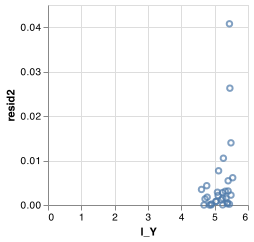

In [112]:
data |> @vlplot(:point, x=:l_Y, y=:resid2)

In [113]:
using Plots
gr()

Plots.GRBackend()

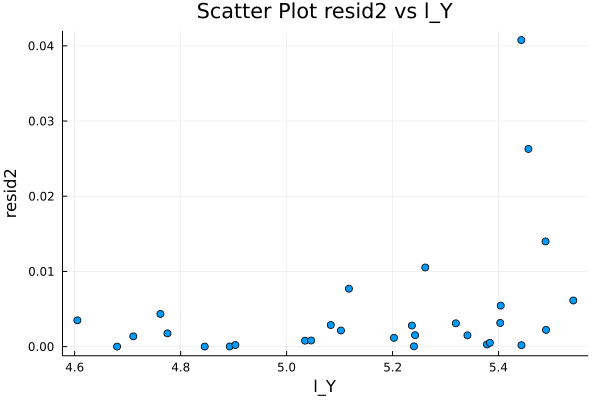

In [114]:
scatter(data.l_Y,data.resid2, title = "Scatter Plot resid2 vs l_Y", ylabel = "resid2", xlabel = "l_Y",legend = false)

In [89]:
# Regresión auxliar
reg_aux = fit(EconometricModel, @formula(log(resid^2) ~ log(Y)), data)

Continuous Response Model
Number of observations: 30
Null Loglikelihood: -68.36
Loglikelihood: -65.08
R-squared: 0.1978
LR Test: 6.54 ∼ χ²(1) ⟹  Pr > χ² = 0.0105
Formula: log(resid ^ 2) ~ 1 + (log(Y))
Variance Covariance Estimator: OIM
──────────────────────────────────────────────────────────────────────────
                 PE       SE      t-value  Pr > |t|       2.50%     97.50%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -26.6579   7.56514  -3.52378    0.0015  -42.1544    -11.1614
log(Y)         3.84634  1.46374   2.62775    0.0138    0.848003    6.84468
──────────────────────────────────────────────────────────────────────────

In [90]:
l_sigma2=(predict(reg_aux))

30-element Vector{Float64}:
 -8.94481836222532
 -8.656643217882213
 -8.538912290301031
 -8.342243837233681
 -8.290956378394899
 -8.020635301615034
 -7.838968595824493
 -7.797928875227548
 -7.2920373617086085
 -7.248237744278676
 -7.105422398861393
 -7.03174283110911
 -6.973937182158785
  ⋮
 -6.197483681989663
 -6.1134858092938344
 -5.971695939984816
 -5.950800388833738
 -5.875429310772095
 -5.871967467123586
 -5.7223158063868205
 -5.7213174892246705
 -5.6707418622162855
 -5.546342926862476
 -5.543005845490043
 -5.34503952196938

In [91]:
data.l_sigma2 = l_sigma2

30-element Vector{Float64}:
 -8.94481836222532
 -8.656643217882213
 -8.538912290301031
 -8.342243837233681
 -8.290956378394899
 -8.020635301615034
 -7.838968595824493
 -7.797928875227548
 -7.2920373617086085
 -7.248237744278676
 -7.105422398861393
 -7.03174283110911
 -6.973937182158785
  ⋮
 -6.197483681989663
 -6.1134858092938344
 -5.971695939984816
 -5.950800388833738
 -5.875429310772095
 -5.871967467123586
 -5.7223158063868205
 -5.7213174892246705
 -5.6707418622162855
 -5.546342926862476
 -5.543005845490043
 -5.34503952196938

In [92]:
data

,resid,Y,l_sigma2
,Float64,Float64,Float64
1,0.0591241,100.0,-8.94482
2,-0.000817598,107.78,-8.65664
3,0.0369351,111.13,-8.53891
4,-0.0659103,116.96,-8.34224
5,0.0419813,118.53,-8.29096
6,-0.00297911,127.16,-8.02064
7,0.00448554,133.31,-7.83897
8,-0.0144879,134.74,-7.79793
9,0.0280834,153.68,-7.29204


In [93]:
DEM_HET.l_sigma2 = l_sigma2

30-element Vector{Float64}:
 -8.94481836222532
 -8.656643217882213
 -8.538912290301031
 -8.342243837233681
 -8.290956378394899
 -8.020635301615034
 -7.838968595824493
 -7.797928875227548
 -7.2920373617086085
 -7.248237744278676
 -7.105422398861393
 -7.03174283110911
 -6.973937182158785
  ⋮
 -6.197483681989663
 -6.1134858092938344
 -5.971695939984816
 -5.950800388833738
 -5.875429310772095
 -5.871967467123586
 -5.7223158063868205
 -5.7213174892246705
 -5.6707418622162855
 -5.546342926862476
 -5.543005845490043
 -5.34503952196938

In [94]:
DEM_HET

,PA,PB,PC,QA,Y,l_sigma2
,Float64,Float64,Float64,Float64,Float64,Float64
1,100.0,100.0,100.0,100.0,100.0,-8.94482
2,102.42,84.64,85.85,93.74,107.78,-8.65664
3,89.15,97.87,91.76,119.32,111.13,-8.53891
4,97.05,94.83,99.83,98.94,116.96,-8.34224
5,105.26,90.45,103.58,99.58,118.53,-8.29096
6,102.82,111.66,98.07,117.33,127.16,-8.02064
7,113.35,94.2,104.66,99.87,133.31,-7.83897
8,112.9,94.66,100.1,100.95,134.74,-7.79793
9,112.33,94.18,103.31,115.09,153.68,-7.29204


In [101]:
DEM_HET = DEM_HET |> @mutate(w = sqrt(1/exp(_.l_sigma2))) |> DataFrame

,PA,PB,PC,QA,Y,l_sigma2,w
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,100.0,100.0,100.0,100.0,100.0,-8.94482,87.5674
2,102.42,84.64,85.85,93.74,107.78,-8.65664,75.8169
3,89.15,97.87,91.76,119.32,111.13,-8.53891,71.4827
4,97.05,94.83,99.83,98.94,116.96,-8.34224,64.7881
5,105.26,90.45,103.58,99.58,118.53,-8.29096,63.1478
6,102.82,111.66,98.07,117.33,127.16,-8.02064,55.1644
7,113.35,94.2,104.66,99.87,133.31,-7.83897,50.3745
8,112.9,94.66,100.1,100.95,134.74,-7.79793,49.3513
9,112.33,94.18,103.31,115.09,153.68,-7.29204,38.3218


In [102]:
# Estimación MCP
modelo_MCP = fit(EconometricModel, @formula(log(QA) ~ log(PA) + log(PB) + log(PC)+ log(Y)), wts = :w , DEM_HET)

Continuous Response Model
Number of observations: 1044
Null Loglikelihood: -11215.36
Loglikelihood: 1506.84
R-squared: 0.7201
LR Test: 25444.39 ∼ χ²(4) ⟹  Pr > χ² = 0.0000
Formula: log(QA) ~ 1 + (log(PA)) + (log(PB)) + (log(PC)) + (log(Y))
Variance Covariance Estimator: OIM
───────────────────────────────────────────────────────────────────────────
                 PE         SE      t-value  Pr > |t|      2.50%     97.50%
───────────────────────────────────────────────────────────────────────────
(Intercept)   4.53922   0.158825    28.58      <1e-99   4.22756    4.85087
log(PA)      -0.907245  0.027864   -32.5598    <1e-99  -0.961921  -0.852569
log(PB)       0.535968  0.0180149   29.7513    <1e-99   0.500618   0.571318
log(PC)      -0.313914  0.0235907  -13.3067    <1e-36  -0.360205  -0.267623
log(Y)        0.690464  0.0168955   40.8667    <1e-99   0.65731    0.723617
───────────────────────────────────────────────────────────────────────────

In [103]:
weights(modelo_MCP)

30-element StatsBase.FrequencyWeights{Float64, Float64, Vector{Float64}}:
 87.56743490022076
 75.81692926521276
 71.48274880619407
 64.78809832186984
 63.14781128425018
 55.16439079394069
 50.37445986428277
 49.35131626764038
 38.3217906492792
 37.49167364312458
 34.907831399292334
 33.64523413348539
 32.686710582030884
  ⋮
 22.170040291054388
 21.258204280487757
 19.803287712305636
 19.597464476351977
 18.87266644399996
 18.84002758957197
 17.481757404583114
 17.473033412871143
 17.036718577402034
 16.009326576289464
 15.982636636355476
 14.476400343415293